In [1]:
##IMPORT LIBRARIES

import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
import sklearn
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [2]:
data_set=pd.read_csv('networkintrusion.csv')

In [3]:
data_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,11.0,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,5.0,10.0,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,6.0,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [4]:
data_set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22535.000000,22535.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.114665,0.001153,0.003549,0.0,0.000488,0.028433,79.011360,31.110095,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,8.041614,0.048014,0.067829,0.0,0.022084,0.166211,128.522332,89.021735,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,878.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

##DATA PREPROCESSING

In [6]:
##NULL value count on all the columns
data_set.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [7]:
data_set['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [8]:
##'num_outbound_cmds' is a redundant column so remove it from the data set
data_set.drop(['num_outbound_cmds'], axis=1, inplace=True)


In [9]:
data_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.0,11.0,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,0,1,1,0,0,0,0,0,0,5.0,10.0,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,6.0,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [11]:
data_set.describe()
data_set.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'num_root', 'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [12]:
data_set['src_bytes'].fillna(data_set['src_bytes'].mean(), inplace = True)
data_set['dst_bytes'].fillna(data_set['dst_bytes'].mean(), inplace = True)
data_set['count'].fillna(data_set['count'].mean(), inplace = True)
data_set['srv_count'].fillna(data_set['srv_count'].mean(), inplace = True)


In [13]:
data_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,229.0,10.0,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,136.0,1.0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,65.0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,8.0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.0,11.0,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,0,1,1,0,0,0,0,0,0,5.0,10.0,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,6.0,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [14]:
data_set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.114665,0.001153,0.003549,0.000488,0.028433,79.011360,31.110095,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121907e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,8.041614,0.048014,0.067829,0.022084,0.166211,128.496674,89.003963,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.030000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,878.000000,5.000000,4.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [16]:
data_set.shape

(22544, 39)

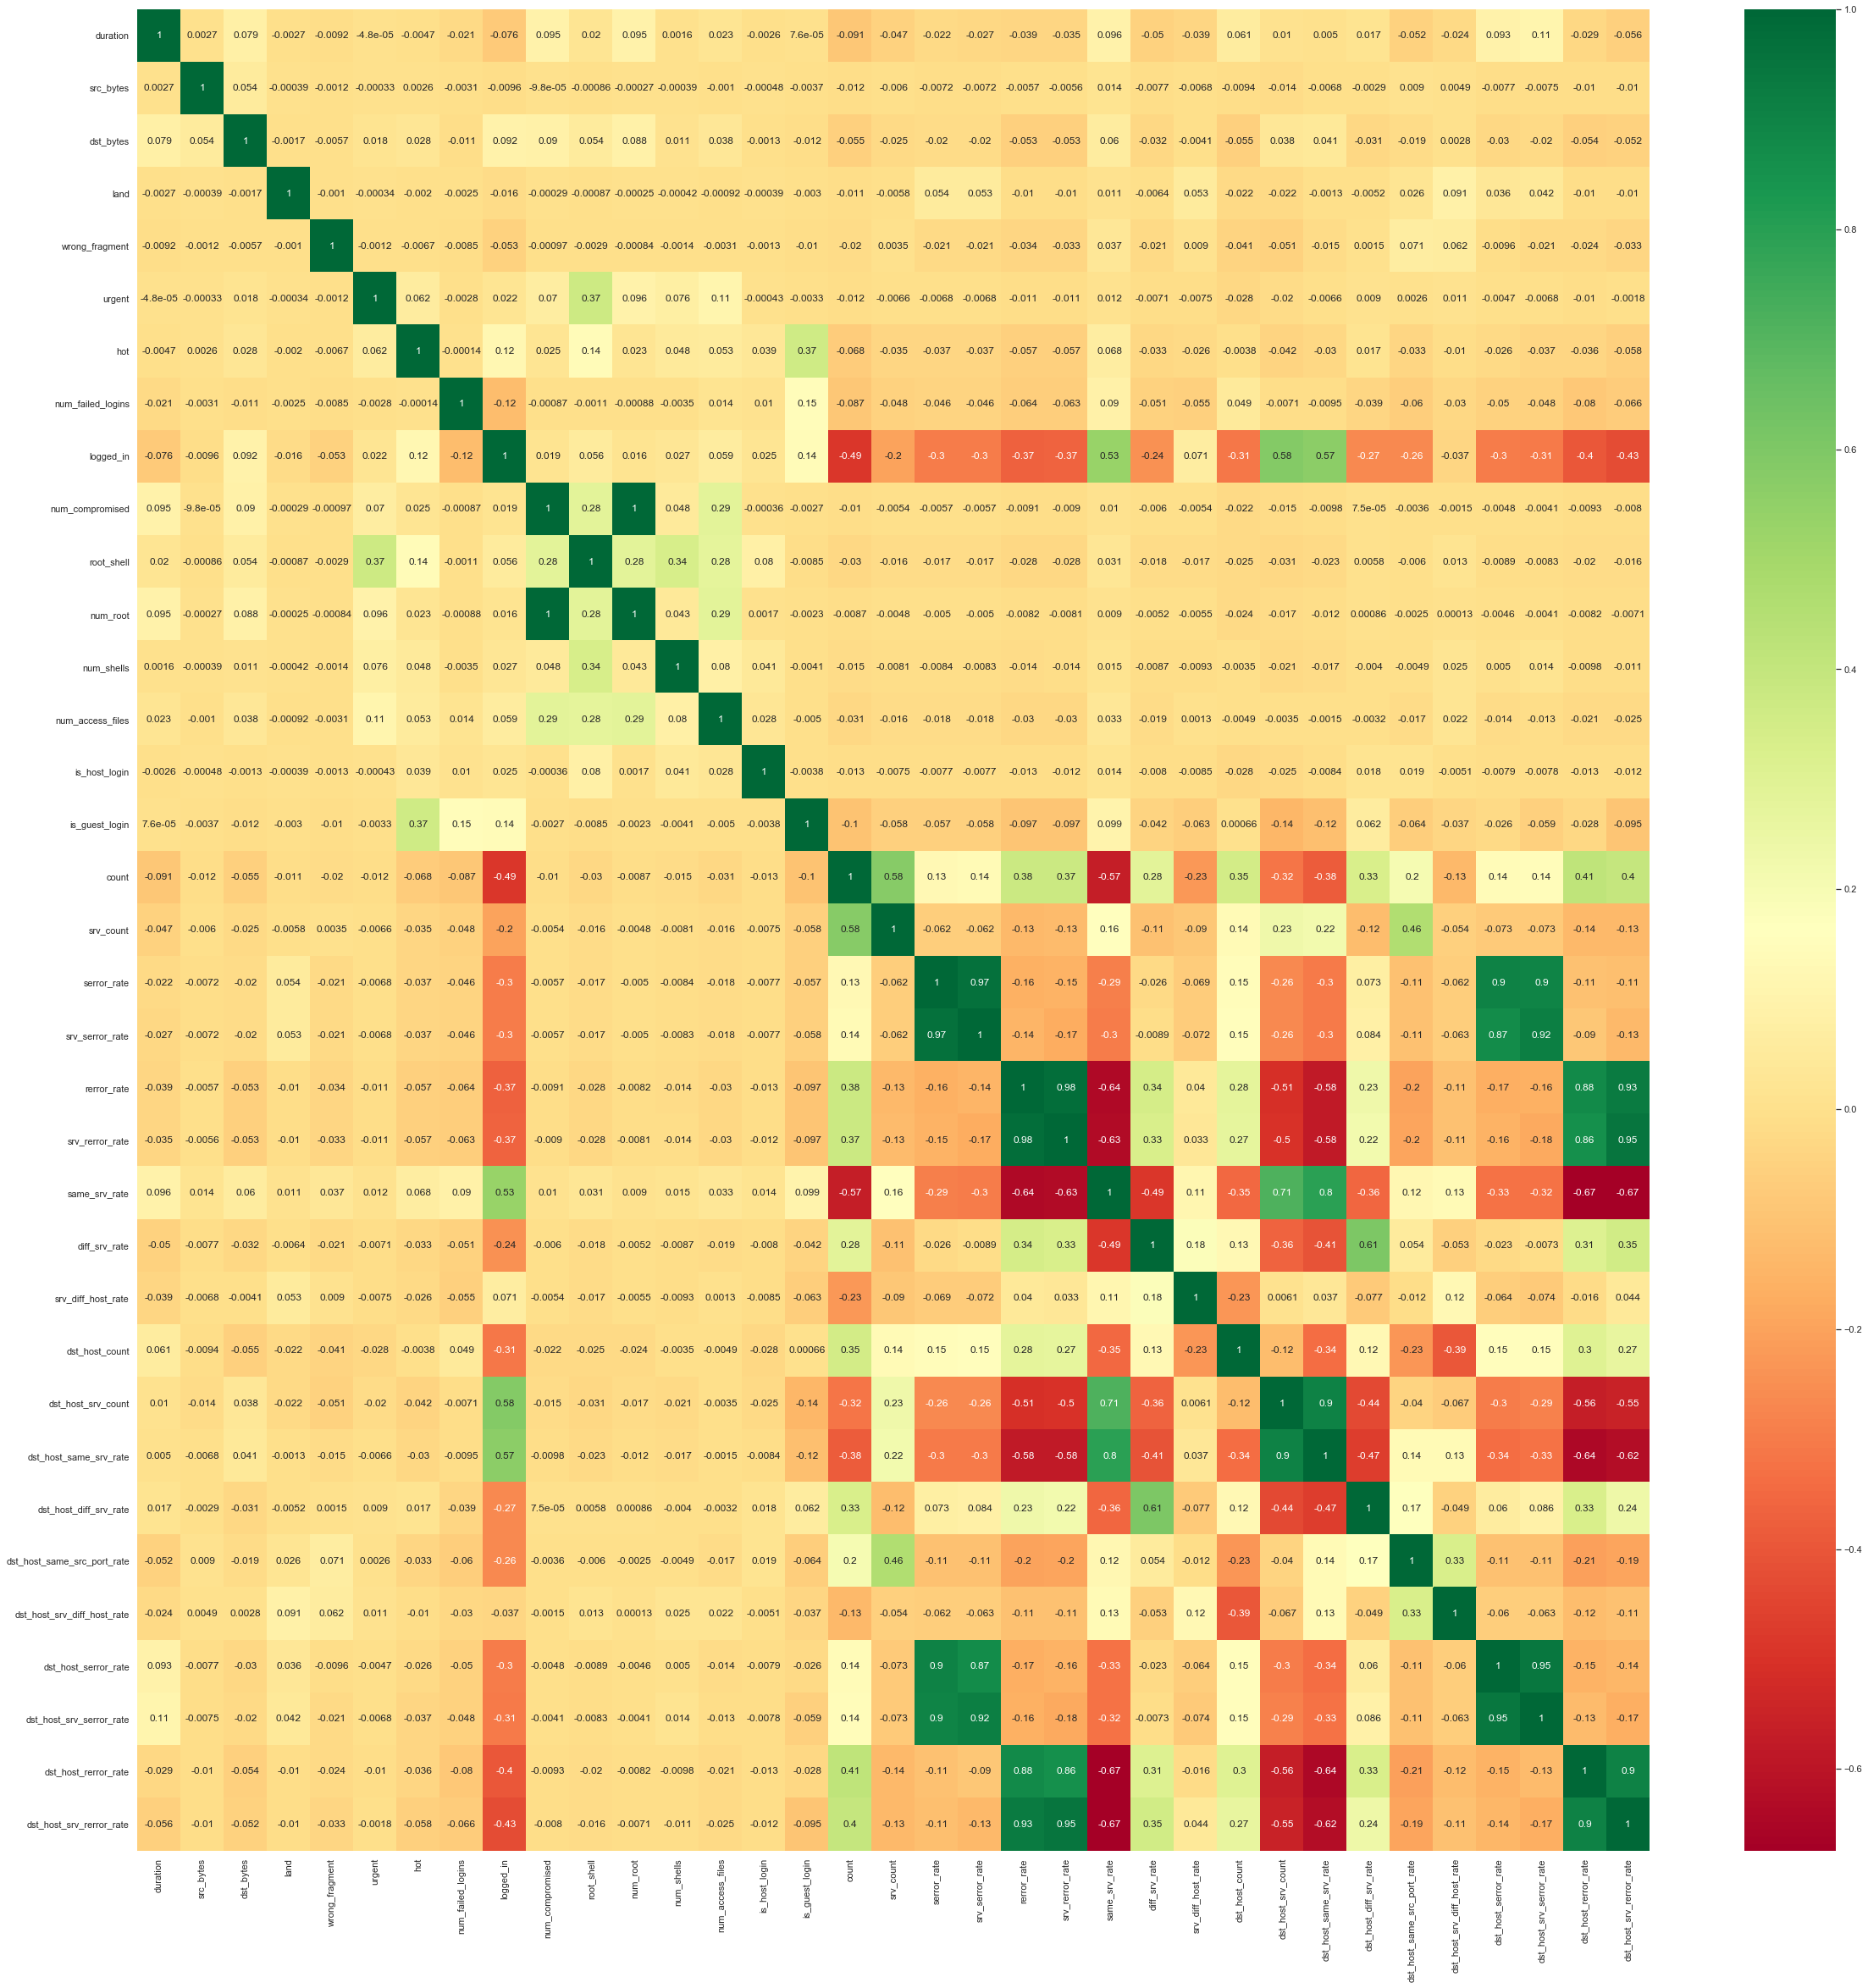

In [19]:
plt.figure(figsize=(40,40))
p=sns.heatmap(data_set.corr(),annot=True,cmap ='RdYlGn')

In [20]:
##Standardization of Numerical Attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
cols = data_set.select_dtypes(include=['float64','int64']).columns

In [22]:
cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'num_root', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [23]:
scaling_data_set = scaler.fit_transform(data_set.select_dtypes(include=['float64','int64']))

In [25]:
scaling_data_set_df=pd.DataFrame(scaling_data_set,columns=cols)

In [26]:
scaling_data_set_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04,2.254400e+04
mean,-1.329446e-15,4.086042e-16,8.498175e-18,-2.094321e-15,-7.720708e-16,-1.056485e-16,9.284797e-16,-3.090787e-16,-1.047965e-15,2.766364e-16,-6.990548e-16,5.794963e-16,2.160168e-16,2.301014e-16,-3.320518e-15,-6.760497e-16,1.108844e-16,-1.034959e-15,7.803276e-16,-2.354151e-16,2.440284e-16,-5.687037e-17,2.426101e-16,9.438472e-16,-1.062158e-16,-3.433103e-16,2.440580e-16,2.414774e-16,1.774860e-17,1.122234e-15,1.377732e-16,1.408743e-15,4.302163e-16,5.395495e-16,1.592351e-16
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.555341e-01,-2.199376e-02,-9.687648e-02,-1.762386e-02,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,-8.903726e-01,-1.649356e-02,-4.945341e-02,-1.425923e-02,-2.402047e-02,-5.231803e-02,-2.209464e-02,-1.710713e-01,-6.149040e-01,-3.495438e-01,-3.484680e-01,-3.473900e-01,-5.730790e-01,-5.650541e-01,-1.794832e+00,-3.630345e-01,-3.869626e-01,-2.061704e+00,-1.259158e+00,-1.397181e+00,-4.102172e-01,-4.318562e-01,-2.299804e-01,-3.581176e-01,-3.527496e-01,-6.027189e-01,-5.654831e-01
25%,-1.555341e-01,-2.199376e-02,-9.687648e-02,-1.762386e-02,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,-8.903726e-01,-1.649356e-02,-4.945341e-02,-1.425923e-02,-2.402047e-02,-5.231803e-02,-2.209464e-02,-1.710713e-01,-6.071215e-01,-3.383081e-01,-3.484680e-01,-3.473900e-01,-5.730790e-01,-5.650541e-01,-1.188752e+00,-3.630345e-01,-3.869626e-01,-7.749297e-01,-1.124967e+00,-1.236512e+00,-4.102172e-01,-4.318562e-01,-2.299804e-01,-3.581176e-01,-3.527496e-01,-6.027189e-01,-5.654831e-01
50%,-1.555341e-01,-2.187954e-02,-9.470858e-02,-1.762386e-02,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,-8.903726e-01,-1.649356e-02,-4.945341e-02,-1.425923e-02,-2.402047e-02,-5.231803e-02,-2.209464e-02,-1.710713e-01,-5.526442e-01,-2.821296e-01,-3.484680e-01,-3.473900e-01,-5.730790e-01,-5.650541e-01,6.294875e-01,-3.630345e-01,-3.869626e-01,6.500932e-01,2.437744e-01,7.144681e-01,-3.649093e-01,-4.318562e-01,-2.299804e-01,-3.581176e-01,-3.527496e-01,-6.027189e-01,-5.654831e-01
75%,-1.555341e-01,-2.138671e-02,-6.845803e-02,-1.762386e-02,-5.910394e-02,-1.945925e-02,-1.135212e-01,-1.439989e-01,1.123125e+00,-1.649356e-02,-4.945341e-02,-1.425923e-02,-2.402047e-02,-5.231803e-02,-2.209464e-02,-1.710713e-01,3.423405e-01,-1.697726e-01,-3.484680e-01,-3.473900e-01,2.772593e-02,-3.908614e-01,6.294875e-01,-1.314922e-01,-3.869626e-01,6.500932e-01,1.022079e+00,8.980898e-01,-1.383696e-01,-3.339007e-01,-1.128734e-01,-3.581176e-01,-3.527496e-01,3.269846e-01,-1.414012e-01
max,4.086013e+01,1.328647e+02,6.333458e+01,5.674127e+01,2.097941e+01,8.223479e+01,1.086749e+02,2.646512e+01,1.123

In [29]:
##Scaling of categorical attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
cat_data_set = data_set.select_dtypes(include=['object']).copy()


In [31]:
cat_data_set

,protocol_type,service,flag,class
0,tcp,private,REJ,anomaly
1,tcp,private,REJ,anomaly
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,anomaly
4,tcp,telnet,RSTO,anomaly
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,anomaly
22542,udp,domain_u,SF,normal


In [32]:
scaling_cat_data_set = cat_data_set.apply(encoder.fit_transform)

In [33]:
scaling_cat_data_set

,protocol_type,service,flag,class
0,1,45,1,0
1,1,45,1,0
2,1,19,9,1
3,0,13,9,0
4,1,55,2,0
...,...,...,...,...
22539,1,49,9,1
22540,1,22,9,1
22541,1,22,9,0
22542,2,11,9,1


In [35]:
##Adding Scaled(numerical attribute dataset and categorical data set) to final data set
final_data_set= pd.concat([scaling_data_set_df,scaling_cat_data_set],axis=1)

In [36]:
final_data_set

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
0,-0.155534,-0.021994,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,1.167283,-0.237187,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1,0
1,-0.155534,-0.021994,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,0.443513,-0.338308,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1,0
2,-0.154113,0.005467,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.338308,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9,1
3,-0.155534,-0.021951,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,0.380777,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9,0
4,-0.154823,-0.021994,-0.096170,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.259658,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020314,-0.081183,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.338308,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,49,9,1
22540,-0.155534,-0.021323,-0.052670,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.599339,-0.225951,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.322985,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,22,9,1
22541,-0.155534,0.093367,0.294949,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.575992,-0.237187,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.401869,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,1,22,9,0
22542,-0.155534,-0.021905,-0.094897,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.583774,-0.282130,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.914609,0.650093,0.995240,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,2,11,9,1


In [42]:
final_data_set.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'num_root', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag',
       'class'],
      dtype='object')

In [45]:
X=final_data_set.drop(['class'], axis=1)

In [46]:
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.155534,-0.021994,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,1.167283,-0.237187,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
1,-0.155534,-0.021994,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,0.443513,-0.338308,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
2,-0.154113,0.005467,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.338308,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9
3,-0.155534,-0.021951,-0.096876,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,0.380777,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9
4,-0.154823,-0.021994,-0.096170,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.259658,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020314,-0.081183,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.607121,-0.338308,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,49,9
22540,-0.155534,-0.021323,-0.052670,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.599339,-0.225951,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.322985,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,22,9
22541,-0.155534,0.093367,0.294949,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.575992,-0.237187,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.401869,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,1,22,9
22542,-0.155534,-0.021905,-0.094897,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.014259,-0.02402,-0.052318,-0.022095,-0.171071,-0.583774,-0.282130,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.914609,0.650093,0.995240,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,2,11,9


In [51]:
Y=final_data_set['class']

In [52]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
22539    1
22540    1
22541    0
22542    1
22543    0
Name: class, Length: 22544, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
##DATA SET PARTITION
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [55]:
##MODEL CREATION
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [60]:
 ##Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [59]:
            
## Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [61]:
##MODEL EVALUATION using Training Data
from sklearn import metrics

models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9809252217997464

Model Accuracy:
 0.9982889733840304

Confusion matrix:
 [[8983    0]
 [  27 6770]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8983
           1       1.00      1.00      1.00      6797

    accuracy                           1.00     15780
   macro avg       1.00      1.00      1.00     15780
weighted avg       1.00      1.00      1.00     15780



============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9399873257287705

Model Accuracy:
 0.9391634980988594

Confusion matrix:
 [[8580  403]
 [ 557 6240]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8983
           1       0.94      0.92      0.

In [62]:
##Model Validation using Test data
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9800413956238911

Confusion matrix:
 [[3789   61]
 [  74 2840]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3850
           1       0.98      0.97      0.98      2914

    accuracy                           0.98      6764
   macro avg       0.98      0.98      0.98      6764
weighted avg       0.98      0.98      0.98      6764



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9365759905381431

Confusion matrix:
 [[3692  158]
 [ 271 2643]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3850
           1       0.94      0.91      0.92      2914

    accuracy                           0.94      6764
   macro avg       0.94     